# 머신러닝 모델
- 결정트리, 랜덤포레스트, kNN, 나이브 베이즈, 선형모델, SVM

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-05-30%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%209.13.52.png?raw=1" align='left'  width=400>

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-05-30%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%209.15.40.png?raw=1" align='left'  width=500>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

In [2]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_breast_cancer

## 데이터

- 유방암 데이터

In [3]:
cancer = load_breast_cancer() 
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target
print(X.shape)
X[:3]

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


## 데이터 탐색

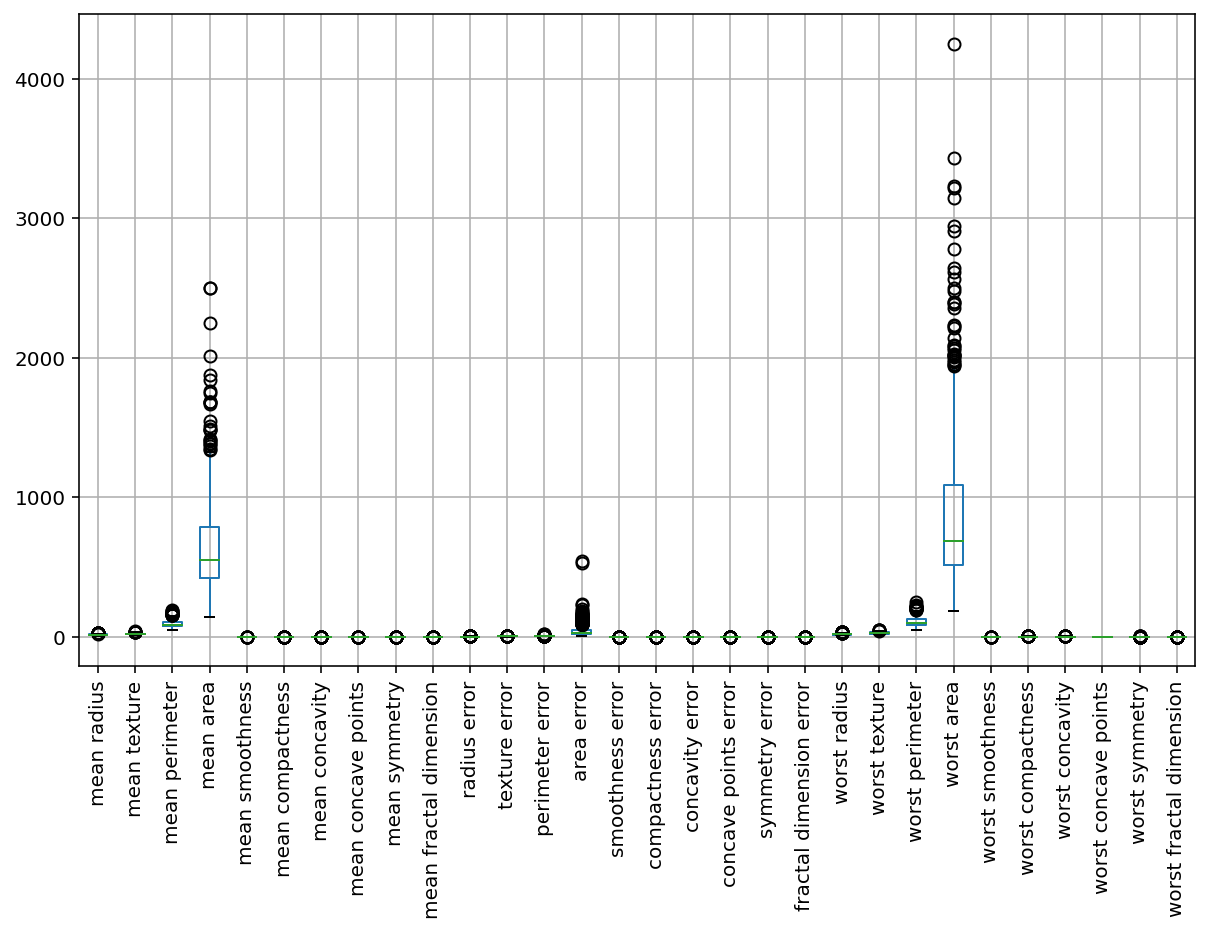

In [4]:
plt.figure(figsize=(10,6))
X.boxplot()
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

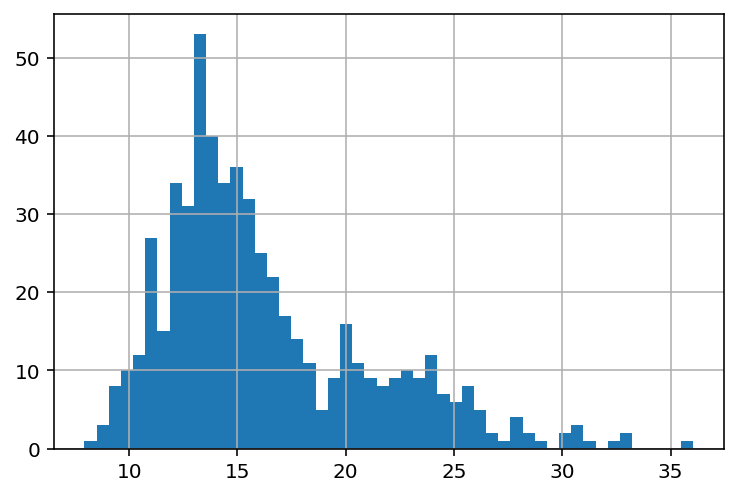

In [5]:
X['worst radius'].hist(bins=50)

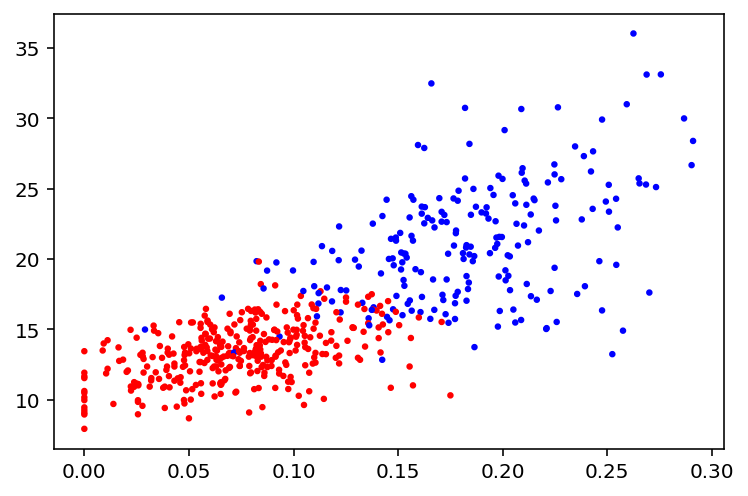

In [6]:
plt.scatter(X['worst concave points'],X['worst radius'], c=y, cmap='bwr',s=5)

In [7]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [8]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [9]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9)

In [11]:
# 스케일링
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# scaler = StandardScaler() # 표준 스케일링 (추천)
scaler = MinMaxScaler() # 모든 값이 양수로만 표현되어야 할 때
X_train, X_test, y_train, y_test = train_test_split(scaler.fit_transform(X), y, random_state=9)
from sklearn.linear_model import SGDClassifier
lin=SGDClassifier()
lin.fit(X_train, y_train)
lin.score(X_test, y_test)

0.972027972027972

In [13]:
lin.coef_.ravel()

array([ -5.88450051,  -5.13143705,  -5.40170062,  -5.02688632,
        -3.03616181,   5.19471674,  -4.97248403,  -6.1933668 ,
        -1.52305682,   4.0474674 ,  -7.52561162,   0.31162069,
        -5.21020053,  -4.77796067,  -2.52179248,   5.07690964,
         1.2390811 ,   0.70426065,   0.59067833,   3.14303673,
       -11.31386648,  -9.65580544,  -9.4986478 ,  -8.36360182,
       -10.75303404,   1.7389916 ,  -5.75525209,  -6.58191613,
        -4.63219399,  -2.41545128])

In [14]:
def plot_features_weights(features, weights):
    W = pd.DataFrame({'Weights':weights}, features)
    W.sort_values(by='Weights', ascending=True).plot(kind='barh', 
                        color='r', figsize=(8,6))
    plt.gca().legend_ = None

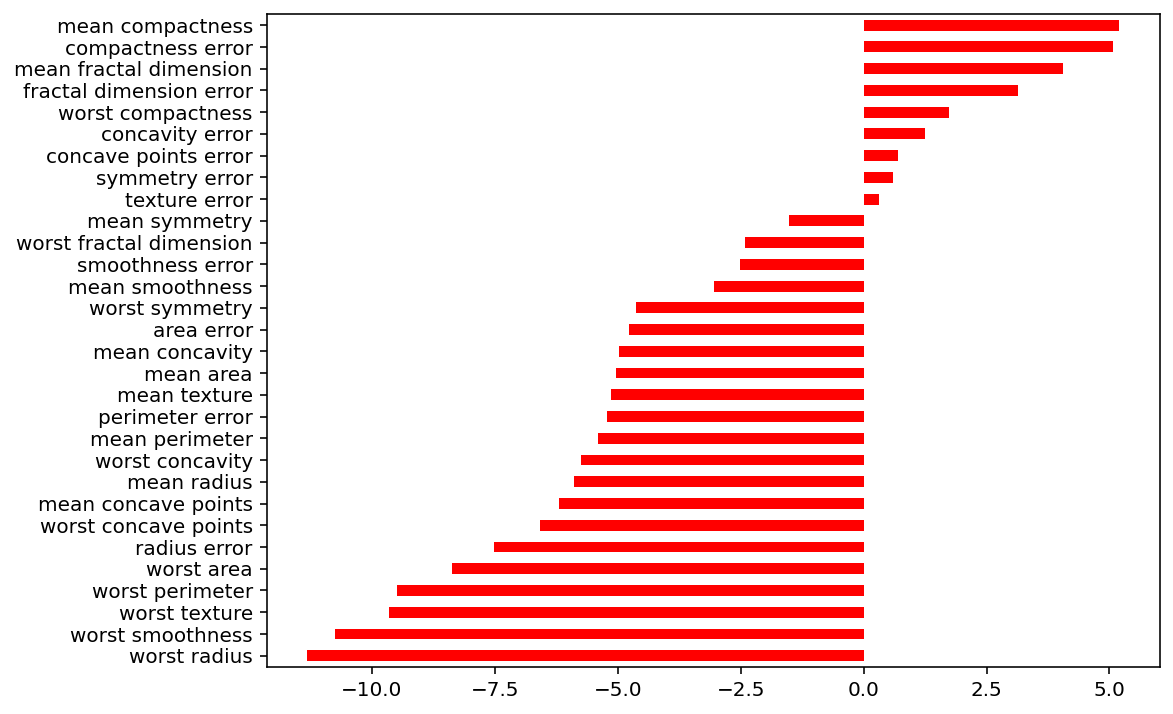

In [15]:
plot_features_weights(cancer.feature_names,lin.coef_.ravel())

In [16]:
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.972027972027972

In [26]:
lr.predict(X_test)[:10]

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0])

In [24]:
len(X_test)

143

In [43]:
# lr.predict(X_test) # 암 판별 결과를 예측할 때 predict() 사용했다
pr_cancer = lr.predict_proba(X_test)[:,0].round(3)
new_y_pred = (pr_cancer  > 0.3) #  새로운 기준으로 암 판정하는 방법


0.24475524475524477

In [17]:
cross_val_score(lr, X, y,cv=10).mean()

0.9455513784461151

# 결정 트리

In [16]:
X_train.shape, X_test.shape

((426, 30), (143, 30))

In [44]:
from sklearn.tree import DecisionTreeClassifier
tr = DecisionTreeClassifier()
tr.fit(X_train, y_train)
tr.score(X_test, y_test)

0.9440559440559441

## 교차 검증

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-05-30%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%209.27.57.png?raw=1" align='left'  width=400>

In [18]:
cross_val_score(tr, X, y, cv=5)

array([0.90350877, 0.92105263, 0.90350877, 0.92105263, 0.91150442])

In [19]:
cross_val_score(tr, X, y, cv=5).mean().round(4)

0.9086

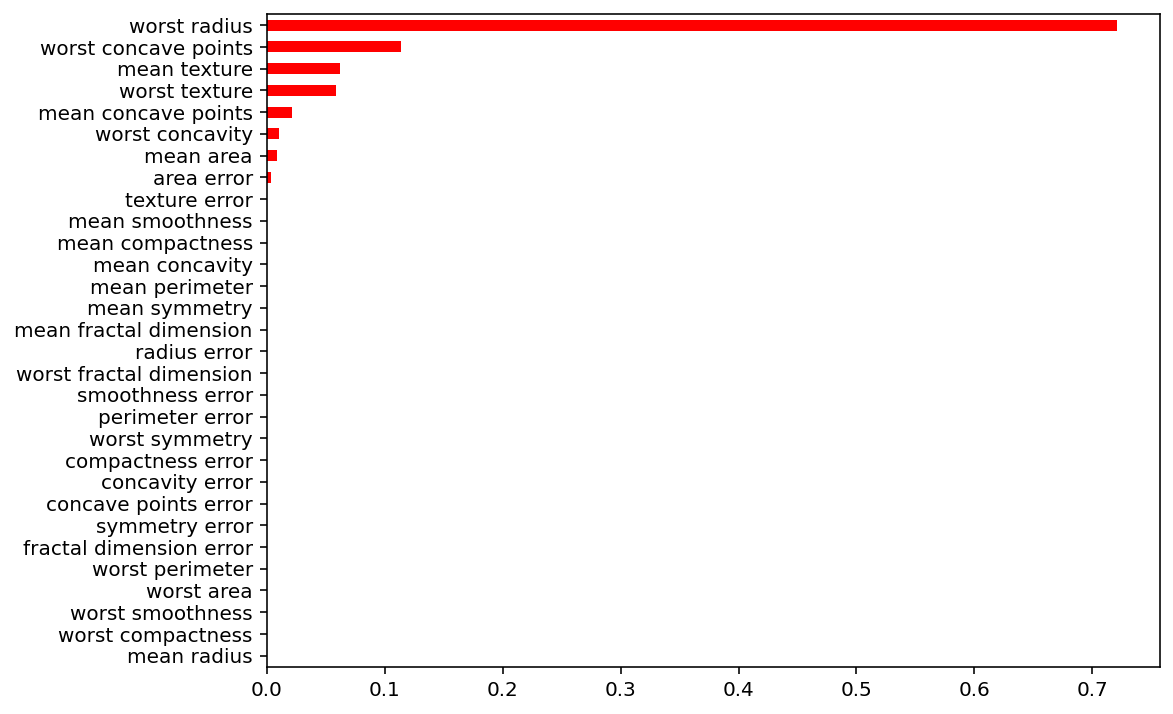

In [45]:
plot_features_weights(cancer.feature_names,tr.feature_importances_)

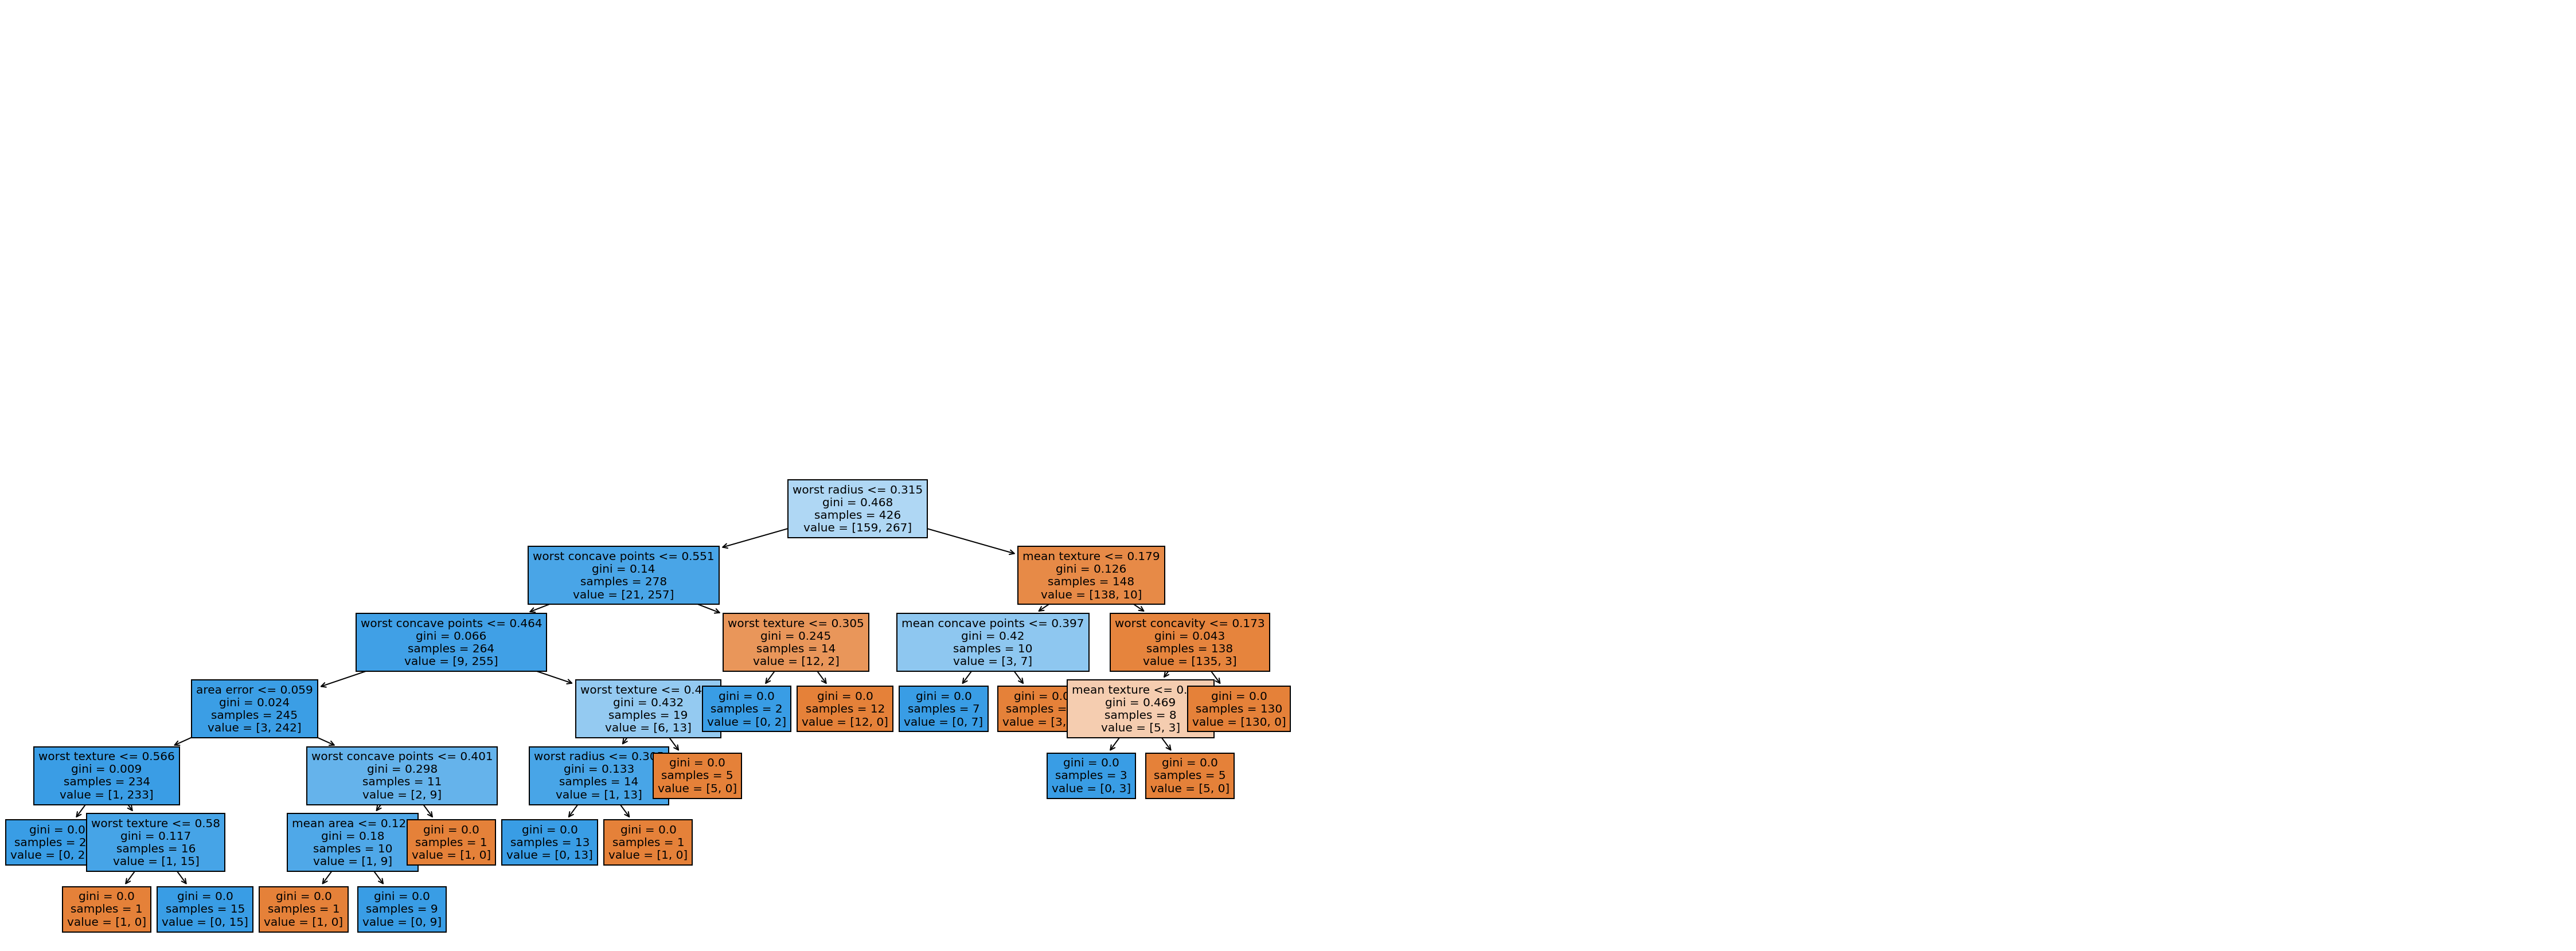

In [46]:
from sklearn import tree
import matplotlib
plt.figure(figsize=(40,15))
tree.plot_tree(tr, fontsize=10,
              feature_names=cancer.feature_names,
              filled=True,
              impurity=True)
#               max_depth=3)
plt.show()

In [22]:
# text_representation = tree.export_text(tr, feature_names=list(cancer.feature_names))
# print(text_representation)

# 랜덤 포레스트
- 결정 트리의 성능을 개선한 방법
- 간단한 구조의 결정 트리(weak learner)를 수십~수백개를 만들고 각 결정 트리의 동작 결과의 평균치를 구하는 방법
- 앙상블(ensemble) 방법이 하나의 모델만 만드는 것보다 좋은 성능을 보인다
- 각 결정 트리를 만들 때 훈련 데이터의 일부만 사용하거나 특성의 일부를 무작위로 선택하여 만든다 
- 앙상블의 갯수: n_estimators

- 랜덤 포레스트 개념

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%204.13.52.png?raw=1" align='left'  width=400>

## 소프트 투표

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%204.52.18.png?raw=1" align='left'  width=400>

In [47]:
rfc = RandomForestClassifier(n_estimators=100, random_state=99)
rfc.fit(X_train, y_train)
print(rfc.score(X_test, y_test))

0.972027972027972


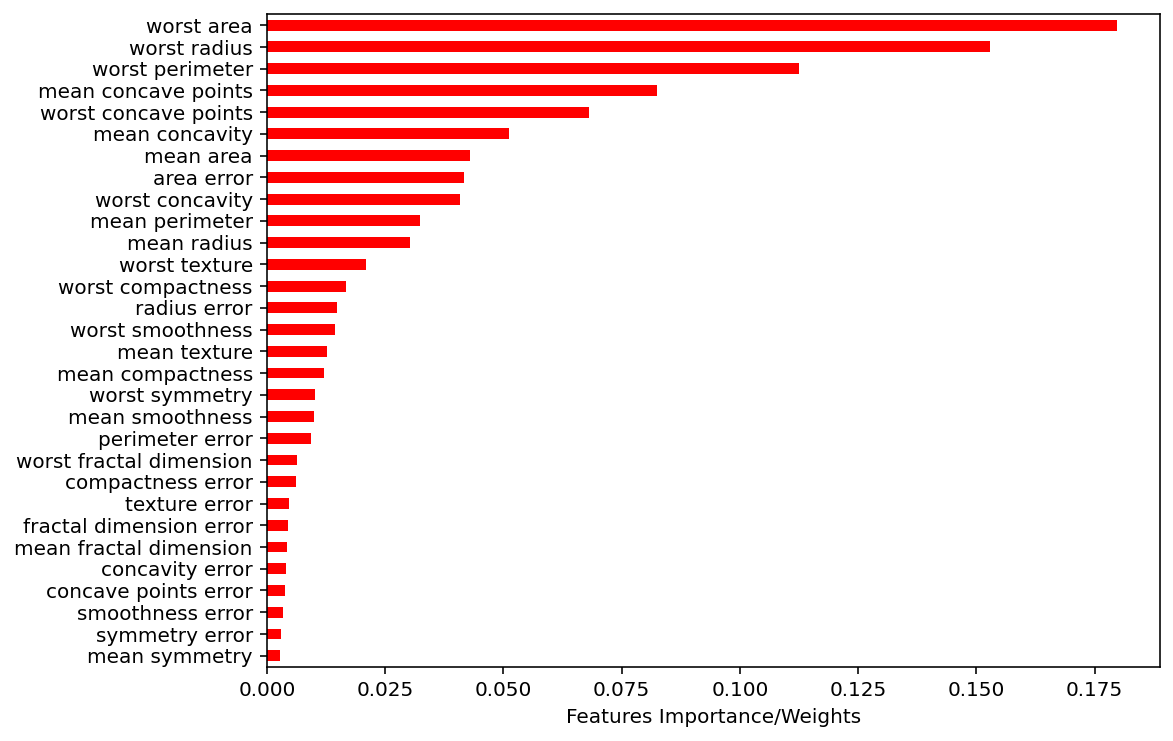

In [60]:
plot_features_weights(cancer.feature_names,rfc.feature_importances_)

# 나이브 베이즈

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-05-30%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%209.29.38.png?raw=1" align='left'  width=250>

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-05-30%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%209.29.56.png?raw=1" align='left'  width=200>

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-05-30%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%209.30.57.png?raw=1" align='left'  width=550>

In [62]:
# 다항 나이브 베이즈 분류 함수, MultinomialNB
nb_clf = MultinomialNB()
cross_val_score(nb_clf, X, y, cv=5).mean().round(4)

0.8963

# SVM

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-05-30%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%209.28.37.png?raw=1" align='left'  width=500>

In [63]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
cross_val_score(svc, X, y, cv=5).mean().round(4)

0.9455

# 하이퍼파라미터 최적화
- 과대적합이나 과소적합을 줄이는 과정

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-05-30%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%209.18.00.png?raw=1" align='left'  width=300>

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-05-30%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%209.18.09.png?raw=1" align='left'  width=300>

# kNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier  
knn = KNeighborsClassifier(n_neighbors=9)
cross_val_score(knn, X, y, cv=5).mean().round(4)

0.9315

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-05-30%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%209.28.52.png?raw=1" align='left'  width=300>

In [66]:
for i in range(1,31,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    print("K=", i, ": {:.2f}".format(knn.score(X_test, y_test)))

K= 1 : 0.98
K= 3 : 0.98
K= 5 : 0.97
K= 7 : 0.97
K= 9 : 0.98
K= 11 : 0.97
K= 13 : 0.97
K= 15 : 0.97
K= 17 : 0.97
K= 19 : 0.97
K= 21 : 0.97
K= 23 : 0.97
K= 25 : 0.97
K= 27 : 0.97
K= 29 : 0.97


##  그리드 탐색

<img src="
https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%204.21.02.png?raw=1" aligh='left' width=350>

## (참고) SVM 최적화

In [15]:
from sklearn.model_selection import GridSearchCV

#그리드 서치의 매개변수를 설정한다(C, gamma)
params = [{"C": [1,10,100,1000,10000], "kernel":["linear"]},
    {"C": [1,10,100,1000], "kernel":["rbf"], "gamma":[0.001, 0.0001]}]

clf = GridSearchCV(SVC(), params, n_jobs=-1 )
clf.fit(X_train, y_train)
print('최적값 :', clf.best_estimator_)
print('최적 score :', clf.best_score_)

#테스트 데이터로 최종 평가
score = clf.score(X_test, y_test)
print('최종 평가 =',score)

최적값 : SVC(C=1, kernel='linear')
최적 score : 0.9647332421340631
최종 평가 = 0.9370629370629371


# 성능 개선

# 배깅 앙상블
- "같은" 모델을 사용하고 데이터를 무작위로 달리 사용한다
- 배깅: 중복허용 (bootstrap aggregation)
- 페이스팅: 중복 불 허용
- 병렬로 처리할 수 있다
- (예)랜덤 포레스트: 배깅을 적용한 결정트리 앙상블 기법

## OOB 평가
- out of bagging
- 훈련에 사용되지 않는 37%의 데이터를 검증에 사용
- 선택되지 않을 확률: e**(-1)
- 선택될 확률: (1 - e**(-1))
- oob_score=True로 하면 자동으로 평가를 해준다 (검증 데이터를 따로 사용하지 않는다)

# 부스팅 알고리즘
- 앞의 약한 모델을 보완해 나가는 앙상블 모델
- (예)에이다부스트 (adaptive boosting)
- 이전 모델에서 과소적합했던 훈련 샘플의 가중치를 더 높여주는 것 (학습하기 어려운 샘플에 점점 더 맞춰진다)
- 잘 못 분류된 훈련 샘플의 가중치를 높인다, 두번째 분류기는 업데이트된 가중치를 사용하여 "예측기"를 만들어본다 (단계별로 채점을 해보는 것임)
- 경사하강법이 "손실함수"를 점차 줄이듯이, 에이다 부스트는 예측기를 만들어 "성능"이 좋아지도록 학습한다.
- 모든 예측기를 만든 이후에 배깅이나 페이스팅을 적용한다. 단 가중치가 적용된 정확도에 따라 예측기마다 다른 가중치를 적용한다
- 병렬처리는 안된다

<img src= "https://bit.ly/2zjphkA" width="500">

## 개선된 부스팅
### XGBoost
### LIghtGBM